# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.627144e+01     1.096401e+01
 * time: 0.0015468597412109375
     1     3.553781e+01     8.347352e+00
 * time: 0.003866910934448242
     2     2.859889e+01     8.328282e+00
 * time: 0.00910496711730957
     3     2.370650e+01     2.865929e+00
 * time: 0.015300989151000977
     4     2.051317e+01     2.094612e+00
 * time: 0.02081298828125
     5     1.958691e+01     1.523951e+00
 * time: 0.026367902755737305
     6     1.904632e+01     2.223802e+00
 * time: 0.030998945236206055
     7     1.860768e+01     1.197088e+00
 * time: 0.03556990623474121
     8     1.828306e+01     1.121915e+00
 * time: 0.040103912353515625
     9     1.804523e+01     8.984225e-01
 * time: 0.044523000717163086
    10     1.789912e+01     6.001574e-01
 * time: 0.049069881439208984
    11     1.787934e+01     1.211456e+00
 * time: 0.05267500877380371
    12     1.787007e+01     1.172277e+00
 * time: 0.05627799034118652
    13     1.785205e+01     9.020058e-01
 *

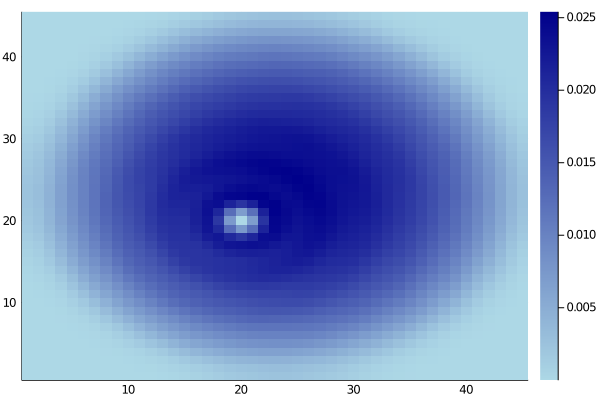

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)